# **ANÁLISIS DE CONTRASEÑAS FOROMOTOS**

### **Grupo:** 22  **Grupo Clase:** 85
 **Nombre:** Aitana Antonia Ortiz Guiño  
 **NIA:** 100472097  

 **Nombre:** Alba Vidales Casado  
 **NIA:** 100472236  


**MODELO ORDENADOR EN EL QUE SE EJECUTO LA PRÁCTICA**:

Este cuaderno proporciona un análisis detallado de las contraseñas rotas, incluyendo:
- Identificación de contraseñas repetidas por pareja {Usuario, Contraseña}
- Distribución de longitudes de contraseñas
- Análisis de caracteres especiales en las contraseñas
- Identificación de contraseñas repetidas {Contraseña}
- Tiempo de ejecución para cada método de crackeo


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

## Carga de datos
Cargar los datos de las contraseñas rotas desde el archivo de salida generado y analizarlos en un DataFrame.

In [6]:
# Cargar los datos de las contraseñas rotas
data_file = 'outputs/passwords_cracked_foromotos.txt'

# Leer los datos en un DataFrame, cada fila representa un par usuario-contraseña
passwords = []
with open(data_file, 'r', encoding='utf-8') as file:
    for line in file:
        if ':' in line:
            user, password = line.strip().split(':', 1)
            passwords.append({'user': user, 'password': password})

# Crear un DataFrame para un análisis posterior
passwords_df = pd.DataFrame(passwords)
passwords_df


,user,password
0,fastidioEiquematico7,acordonar
1,melodiaPerspicuo,cañón7&
2,fosaGoloso647,Sutura
3,vacaPlenipotenciario214,Epigrafista
4,fatidicoAstuto36393,4n4$4rc4
...,...,...
81664,asuntoFlacido70,rcnal
81665,tarjetaInfausto3047,trígono9#
81666,posteEmbriagador271,ambas!@
81667,masajePadecido143639,stvua


# **ANÁLISIS FOROMOTOS**

## Analizar Contraseñas Repetidas por parejas {Usuario, Contraseña}
Esta sección analiza la distribución de las longitudes de las contraseñas, centrándose en contraseñas con diferentes rangos (4-5 caracteres, 6-7 caracteres, etc.).

In [3]:
# Agrupar por usuario y contraseña, contando las ocurrencias
user_password_counts = passwords_df.groupby(['user', 'password']).size().reset_index(name='count')

# Filtrar para encontrar usuarios con la misma contraseña más de una vez
repeated_user_passwords = user_password_counts[user_password_counts['count'] > 1]

# Imprimir el total de repeticiones de usuario-contraseña
total_repeated_user_passwords = repeated_user_passwords.shape[0]
print(f'Total de pares usuario-contraseña repetidos: {total_repeated_user_passwords}')

Total de pares usuario-contraseña repetidos: 0


## Analizar la Longitud de las Contraseñas
Esta sección analiza la distribución de las longitudes de las contraseñas, centrándose en contraseñas con diferentes rangos (4-5 caracteres, 6-7 caracteres, etc.).

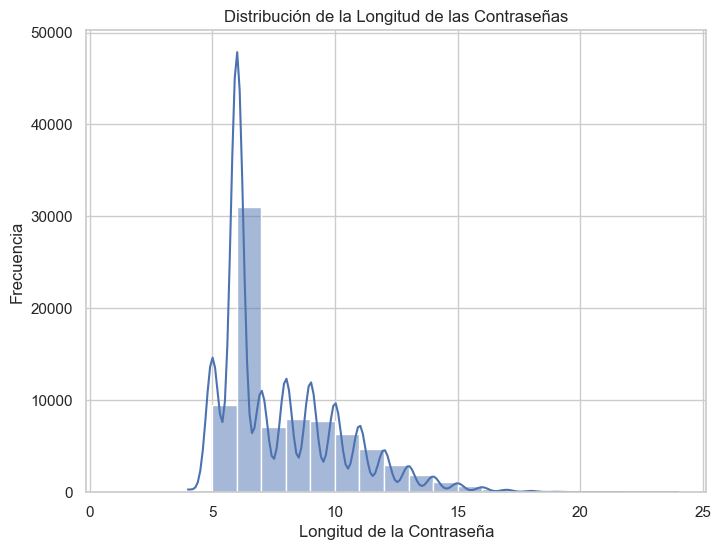

In [4]:
# Calcular la longitud de cada contraseña
passwords_df['length'] = passwords_df['password'].apply(len)

# Crear un histograma de las longitudes de las contraseñas
plt.figure(figsize=(8, 6))
sns.histplot(passwords_df['length'], bins=range(1, 21), kde=True)
plt.title('Distribución de la Longitud de las Contraseñas')
plt.xlabel('Longitud de la Contraseña')
plt.ylabel('Frecuencia')
plt.show()

En esta gráfica se presenta la relación entre la frecuencia y la longitud de las contraseñas en el conjunto de datos. Se observa que las contraseñas con una longitud de 6 caracteres son las más comunes, alcanzando una frecuencia de hasta 50,000 unidades. A continuación, las contraseñas de 5 caracteres tienen una frecuencia cercana a 10,000 unidades. Por otro lado, las contraseñas de 6 caracteres en adelante muestran frecuencias más bajas, llegando hasta las contraseñas de longitud 17-18, como se puede apreciar en la gráfica.



## Analizar Caracteres Especiales
Determinar el número de contraseñas que contienen caracteres especiales y visualizar su distribución.

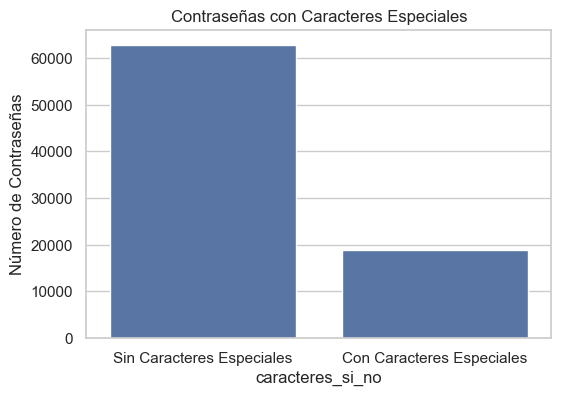

In [5]:
# Función para verificar caracteres especiales en las contraseñas
import re

def contains_special_chars(password):
    # Considera como especial cualquier carácter que no sea letra o dígito
    return bool(re.search(r'[^A-Za-z0-9]', password))

# Agregar una columna para indicar si una contraseña contiene caracteres especiales
passwords_df['caracteres_si_no'] = passwords_df['password'].apply(contains_special_chars)

# Contar y visualizar la ocurrencia de contraseñas con caracteres especiales
special_counts = passwords_df['caracteres_si_no'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=special_counts.index, y=special_counts.values)
plt.title('Contraseñas con Caracteres Especiales')
plt.xticks([0, 1], ['Sin Caracteres Especiales', 'Con Caracteres Especiales'])
plt.ylabel('Número de Contraseñas')
plt.show()


La gráfica presentada entonces muestra la distribución de contraseñas según la presencia o ausencia de caracteres especiales. Se ha realizado un análisis donde las contraseñas se dividen en dos categorías: aquellas que contienen caracteres especiales (por ejemplo, símbolos como "!", "@", "#", etc.) y aquellas que no los contienen, es decir, que solo están formadas por letras y números.

El resultado es claro: una gran mayoría de las contraseñas (más de 60,000) no contienen caracteres especiales, mientras que una menor cantidad (aproximadamente 20,000) sí los incluye. Esto sugiere que, en el conjunto de datos analizado, las contraseñas que carecen de caracteres especiales son mucho más comunes, lo que puede implicar una menor complejidad y, potencialmente, menor seguridad en términos generales.

## Identificar Contraseñas Repetidas Unicamente la parte de {Contraseña}
Encuentra las contraseñas que aparecen más de una vez y visualiza las más repetidas.

In [6]:
# Identificar contraseñas repetidas
repeated_passwords = passwords_df['password'].value_counts()
repeated_passwords = repeated_passwords[repeated_passwords > 1]

# Imprimir el total de contraseñas repetidas
total_repeated_passwords = repeated_passwords.count()
print(f'Total de contraseñas repetidas: {total_repeated_passwords}')

# Ordenar las contraseñas de menos a más repetidas
repeated_passwords_sorted = repeated_passwords.sort_values(ascending=True)

# Mostrar las 40 contraseñas menos repetidas
print('Las 40 contraseñas repetidas, ordenadas de menos a más repetidas:')
print(repeated_passwords_sorted.head(40))

Total de contraseñas repetidas: 2995
Las 40 contraseñas repetidas, ordenadas de menos a más repetidas:
password
Rabioso            2
Habilitado         2
deschapar          2
Regalicia          2
portento           2
refitolear@        2
cortada            2
3xp313r            2
contraescota       2
Compungieran       2
aconteciera        2
Desmembramiento    2
Cairani            2
Mareante           2
Primar             2
Emprensar          2
naife              2
estranguadera      2
Rasquetear         2
Boleto             2
sesgo              2
baquear            2
Lerner             2
negociar           2
Descristianizar    2
yug4d4             2
Síndico            2
Hartera            2
Descascarillado    2
Hamtic             2
Sindicato          2
Rocchac            2
Manieran           2
sentamiento8       2
Paladear           2
Univalvo           2
Collazo            2
Ixtaltepec         2
marquez            2
Rifadura           2
Name: count, dtype: int64


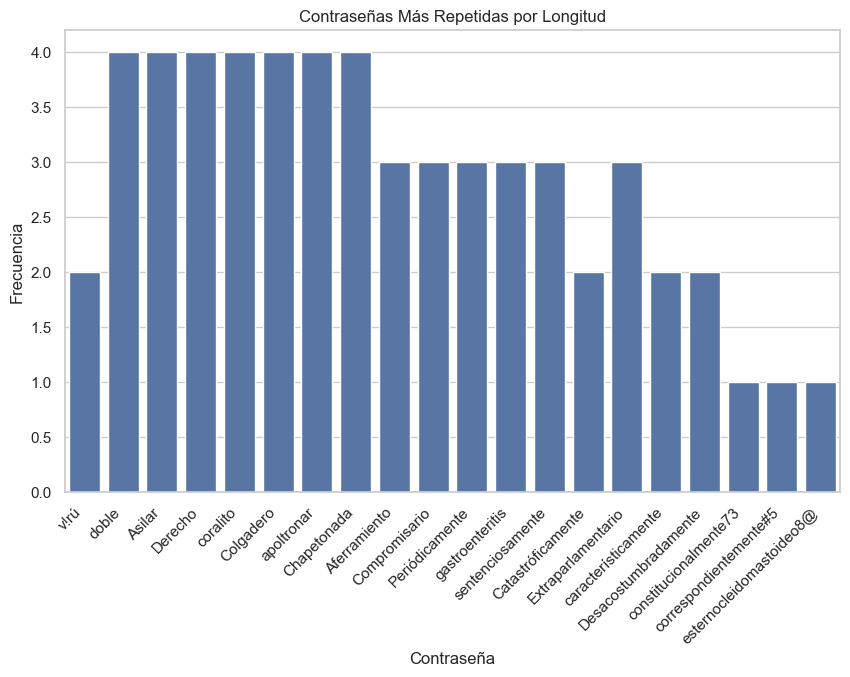

In [7]:
# Identificar las contraseñas repetidas
repeated_passwords = passwords_df['password'].value_counts().reset_index()
repeated_passwords.columns = ['password', 'frequency']

# Agregar una columna de longitud
repeated_passwords['length'] = repeated_passwords['password'].apply(len)

# Encontrar la contraseña más repetida para cada longitud
top_repeated_by_length = repeated_passwords.loc[repeated_passwords.groupby('length')['frequency'].idxmax()]

# Visualizar las contraseñas más repetidas por longitud
plt.figure(figsize=(10, 6))
sns.barplot(x='password', y='frequency', data=top_repeated_by_length)
plt.title('Contraseñas Más Repetidas por Longitud')
plt.xlabel('Contraseña')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

En las imágenes se puede observar un análisis de contraseñas repetidas dentro de un conjunto de datos. El código identifica las contraseñas que aparecen más de una vez y presenta las más repetidas por longitud de contraseña.

Aqui por tanto podemos observar que las contraseñas más largar tienen muy pocas repeticiones, mientras a medida que reducimos el tamaño de ellas observamos una mayor repetición.

## Analizar el Tiempo de Ejecución
Visualiza el tiempo de ejecución para cada método de cracking utilizado en el proceso.

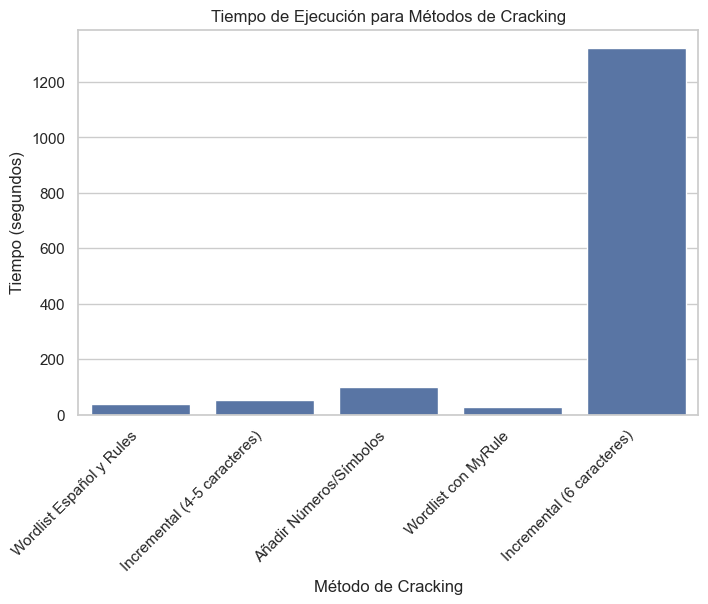

In [8]:
# Datos de ejemplo para los tiempos de ejecución de cada comando (a ser reemplazados por tiempos reales)
execution_data = {
    'Método': ['Wordlist Español y Rules', 'Incremental (4-5 caracteres)', 'Añadir Números/Símbolos', 'Wordlist con MyRule','Incremental (6 caracteres)'],
    'Tiempo (segundos)': [38, 54, 101, 27,  1322]
}

# Crear DataFrame y graficar los tiempos de ejecución
execution_df = pd.DataFrame(execution_data)
plt.figure(figsize=(8, 5))
sns.barplot(x='Método', y='Tiempo (segundos)', data=execution_df)
plt.title('Tiempo de Ejecución para Métodos de Cracking')
plt.xlabel('Método de Cracking')
plt.ylabel('Tiempo (segundos)')
plt.xticks(rotation=45, ha='right')
plt.show()


La imagen superior muestra un análisis de los tiempos de ejecución de diferentes métodos de cracking que hemos utilizado. En la gráfica, se comparan cuatro enfoques:

1. **Wordlist en español con Rules**: Este método tarda aproximadamente **38 segundos**.
2. **Incremental (4-5 caracteres)**: Toma alrededor de **54 segundos**.
3. **Anexar números/caracteres especiales**: Este método es el más rápido, con un tiempo de **101 segundos**.
4. **Wordlist en español con MyRules**: Este método tarda aproximadamente **27 segundos**.
5. **Incremental (6 caracteres)**: Es el más lento, con un tiempo considerable de **1322 segundos**.

A partir de estos datos, podemos concluir que los métodos que utilizan combinaciones más largas o complejas de caracteres (como el método incremental para contraseñas de 6 caracteres) requieren mucho más tiempo para ejecutarse. En cambio, los métodos que se basan en diccionarios o en combinaciones más cortas resultan más rápidos. 

Este análisis nos deja ver que, aunque los ataques más simples como el de diccionario son relativamente rápidos, las contraseñas más largas y complejas aumentan significativamente el tiempo de descifrado, lo cual resalta la importancia de usar contraseñas más largas y variadas para mejorar la seguridad.